# Q3

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
pbook = pd.read_csv("prog_book.csv")

In [4]:
pbook.head()

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
0,4.17,"3,829",The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529
1,4.01,"1,406","The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000
2,3.33,0,Responsive Web Design Overview For Beginners,In Responsive Web Design Overview For Beginner...,50,Kindle Edition,11.267647
3,3.97,"1,658",Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,Hardcover,12.873529
4,4.06,"1,325",How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,Kindle Edition,13.164706


In [5]:
pbook.shape

(271, 7)

## Task 1: Univariate Outlier detection (4 points)
Box plots are efficient in identifying the outliers in numerical values. For this dataset, use the IQR method to identify any univariate outliers in this dataset.  Plot the outliers in the context of the feature's distribution for all the four numerical features (Rating, reviews, number of pages, price).
Your output should be the box plots of each feature.


In [6]:
pbook.Reviews.unique() # they're strings

array(['3,829', '1,406', '0', '1,658', '1,325', '117', '5,938', '1,817',
       '2,093', '160', '481', '33', '1,255', '593', '417', '80', '279',
       '370', '2,092', '27', '676', '16', '1,268', '19', '491', '48', '1',
       '39', '356', '86', '295', '57', '124', '91', '530', '61', '336',
       '4', '115', '2,629', '108', '120', '38', '154', '9', '1,035',
       '302', '116', '126', '17', '58', '130', '3', '50', '78', '22',
       '71', '547', '11', '203', '259', '153', '2', '5', '73', '47',
       '278', '125', '161', '8', '2,290', '118', '59', '122', '64', '21',
       '200', '15', '75', '52', '68', '43', '18', '496', '13', '10', '23',
       '31', '395', '746', '464', '79', '65', '66', '53', '362', '41',
       '70', '55', '28', '875', '452', '163', '168', '26', '32', '92',
       '171', '63', '35', '6', '404', '134', '69', '275', '164', '224',
       '351', '25', '34', '20', '62', '150', '36', '426', '191', '45',
       '88', '194', '44', '7', '56', '14'], dtype=object)

In [7]:
import locale

In [8]:
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

'en_US.UTF-8'

In [9]:
locale.atof('3,208')

3208.0

In [10]:
pbook['Reviews'] = [locale.atof(pbook.Reviews[num]) if "," in pbook.Reviews[num] else float(pbook.Reviews[num]) for num in range(len(pbook.Reviews))]

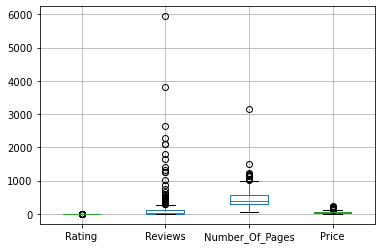

In [11]:
# Plot the outliers in the context of the feature's distribution
boxplot = pbook.boxplot(column=['Rating', 'Reviews', 'Number_Of_Pages', 'Price'])  

### Rating

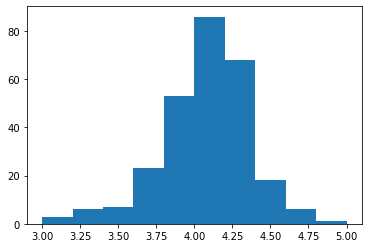

In [12]:
plt.hist(pbook.Rating);

In [13]:
pbook.Rating.describe()

count    271.000000
mean       4.067417
std        0.290749
min        3.000000
25%        3.915000
50%        4.100000
75%        4.250000
max        5.000000
Name: Rating, dtype: float64

In [14]:
# use the IQR method to identify any univariate outliers in this dataset.
iqr = 4.25 - 3.915
low_thresh = 3.915 - 1.5*iqr
high_thresh = 4.25 + 1.5*iqr

In [15]:
pbook.loc[pbook.Rating < low_thresh] # low outliers

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
2,3.33,0.0,Responsive Web Design Overview For Beginners,In Responsive Web Design Overview For Beginner...,50,Kindle Edition,11.267647
24,3.20,0.0,Game Programming Golden Rules,'Game Programming Golden Rules' provides indis...,318,Paperback,19.152941
60,3.32,3.0,Sams Teach Yourself JavaScript in 24 Hours,"JavaScript is one of the easiest, most straigh...",442,Paperback,27.850000
86,3.22,2.0,Beginning Java 2,What is this book about? The Java language has...,1200,Paperback,36.617647
94,3.38,2.0,Sams Teach Yourself Perl in 24 Hours,Learn Perl programming quickly and easily with...,462,Paperback,38.235294
132,3.37,1.0,Unity Virtual Reality Projects,If you are a non-programmer unfamiliar with 3D...,286,Paperback,45.664706
177,3.00,0.0,Advanced Game Programming: A Gamedev.Net Colle...,"Welcome to ""Advanced Game Programming: A GameD...",464,Paperback,59.082353
182,3.00,0.0,Cross-Platform Game Programming (Game Developm...,With many of today's games being released simu...,460,Paperback,60.391176
187,3.00,0.0,"Lambda-Calculus, Combinators and Functional Pr...","Originally published in 1988, this book presen...",192,Paperback,61.167647


In [16]:
pbook.loc[pbook.Rating > high_thresh] # high outliers

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
54,5.00,0.0,Your First App: Node.js,A tutorial for real-world application developm...,317,ebook,25.855882
269,4.77,4.0,"The Art of Computer Programming, Volumes 1-4a ...","""The bible of all fundamental algorithms and t...",3168,Hardcover,220.385294


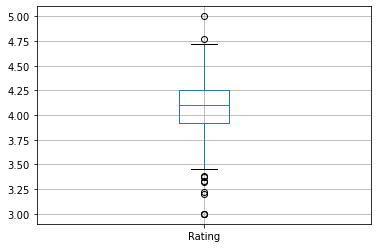

In [17]:
rating = pbook.boxplot(['Rating']) # visualized

### Reviews

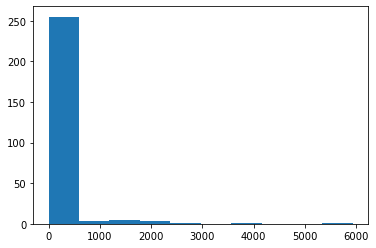

In [18]:
plt.hist(pbook.Reviews);

In [19]:
pbook['Reviews'].describe()

count     271.000000
mean      185.557196
std       552.122252
min         0.000000
25%         5.500000
50%        35.000000
75%       116.500000
max      5938.000000
Name: Reviews, dtype: float64

In [20]:
iqr = 116.5 - 5.5
low_thresh = 5.5 - 1.5*iqr
high_thresh = 116.5 + 1.5*iqr

In [21]:
pbook.loc[pbook['Reviews'] < low_thresh] # none

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price


In [22]:
pbook.loc[pbook['Reviews'] > high_thresh] # lots

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
0,4.17,3829.0,The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529
1,4.01,1406.0,"The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000
3,3.97,1658.0,Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,Hardcover,12.873529
4,4.06,1325.0,How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,Kindle Edition,13.164706
6,4.09,5938.0,Start with Why: How Great Leaders Inspire Ever...,Why do you do what you do?\n\nWhy are some peo...,256,Hardcover,14.232353
7,4.15,1817.0,Algorithms to Live By: The Computer Science of...,A fascinating exploration of how insights from...,368,Hardcover,14.364706
8,3.87,2093.0,Weapons of Math Destruction: How Big Data Incr...,A former Wall Street quant sounds an alarm on ...,259,Hardcover,14.502941
11,3.78,481.0,The Master Algorithm: How the Quest for the Ul...,A thought-provoking and wide-ranging explorati...,352,Hardcover,15.229412
13,3.87,1255.0,"Superintelligence: Paths, Dangers, Strategies",Superintelligence asks the questions: what hap...,328,Hardcover,15.682353
14,3.87,593.0,"The Art of the Start: The Time-Tested, Battle-...","A new product, a new service, a new company, a...",240,Hardcover,15.885294


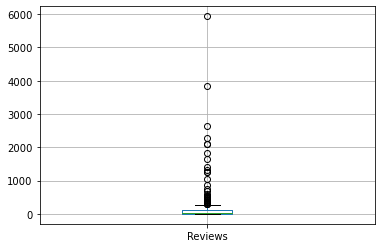

In [23]:
reviews = pbook.boxplot(['Reviews'])

### Number of Pages

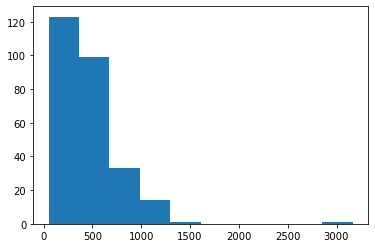

In [24]:
plt.hist(pbook.Number_Of_Pages);

In [25]:
pbook['Number_Of_Pages'].describe()

count     271.000000
mean      475.077491
std       306.147492
min        50.000000
25%       289.000000
50%       384.000000
75%       572.500000
max      3168.000000
Name: Number_Of_Pages, dtype: float64

In [26]:
iqr = 572.5 - 289
low_thresh = 289 - 1.5*iqr
high_thresh = 572.5 + 1.5*iqr

In [27]:
pbook.loc[pbook['Number_Of_Pages'] < low_thresh] # none again

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price


In [28]:
pbook.loc[pbook['Number_Of_Pages'] > high_thresh] # lots again

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
86,3.22,2.0,Beginning Java 2,What is this book about? The Java language has...,1200,Paperback,36.617647
129,3.96,53.0,PHP and MySQL Web Development (Developer's Lib...,"Includes material and code on MySQL 5, PHP 5 a...",1008,Paperback,45.326471
137,4.62,28.0,The Linux Programming Interface: A Linux and U...,The Linux Programming Interface is the definit...,1506,Hardcover,46.358824
203,3.96,150.0,Learning Python,"Portable, powerful, and a breeze to use, Pytho...",1214,Paperback,67.873529
206,4.08,92.0,The C++ Programming Language,More than three-quarters of a million programm...,1040,Hardcover,69.379412
232,3.77,28.0,Database System Concepts,Intended for a first course in databases at th...,1142,Hardcover,85.605882
240,4.33,194.0,Introduction to Algorithms,This title covers a broad range of algorithms ...,1180,Hardcover,92.255882
245,4.35,21.0,Game Engine Architecture,"Hailed as a ""must-have textbook"" (CHOICE, Janu...",1052,Hardcover,96.032353
249,4.03,1.0,Geometric Tools for Computer Graphics,Do you spend too much time creating the buildi...,1056,Hardcover,99.829412
253,4.11,56.0,"Modern Operating Systems, 4th Edition","""Modern Operating Systems, Fourth Edition, """" ...",1136,Paperback,103.461765


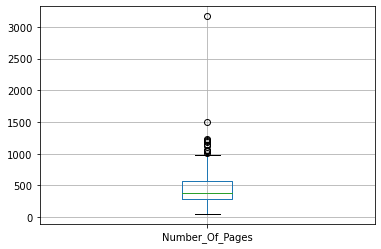

In [29]:
pages = pbook.boxplot(['Number_Of_Pages'])

### Price

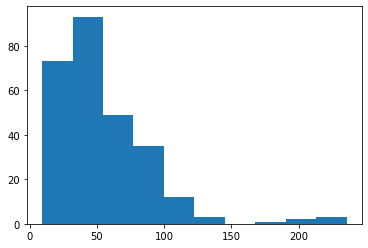

In [30]:
plt.hist(pbook.Price);

In [31]:
pbook['Price'].describe()

count    271.000000
mean      54.541860
std       35.711485
min        9.323529
25%       30.751471
50%       46.317647
75%       67.854412
max      235.650000
Name: Price, dtype: float64

In [32]:
iqr = 67.854412 - 30.751471
low_thresh = 30.751471 - 1.5*iqr
high_thresh = 67.854412 + 1.5*iqr

In [33]:
pbook.loc[pbook['Price'] < low_thresh] # none again

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price


In [34]:
pbook.loc[pbook['Price'] > high_thresh] # lots again

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
262,4.08,56.0,"Compilers: Principles, Techniques, and Tools",This introduction to compilers is the direct d...,796,Hardcover,126.579412
263,3.77,0.0,Game Programming Gems 4,Uncover the secrets of the game industry's bes...,703,Hardcover,139.435294
264,3.82,0.0,Game Programming Gems 3,The journey continues with this ALL NEW volume...,663,Hardcover,143.138235
265,4.26,5.0,Numerical Recipes: The Art of Scientific Compu...,Co-authored by four leading scientists from ac...,1235,Hardcover,176.144118
266,3.76,0.0,3D Game Engine Architecture: Engineering Real-...,Dave Eberly's 3D Game Engine Design was the fi...,752,Hardcover,203.108823
267,3.94,22.0,An Introduction to Database Systems,"Continuing in the eighth edition, An Introduct...",1040,Paperback,212.097059
268,4.49,36.0,"The Art of Computer Programming, Volumes 1-3 B...",Knuth's classic work has been widely acclaimed...,896,Boxed Set - Hardcover,220.385294
269,4.77,4.0,"The Art of Computer Programming, Volumes 1-4a ...","""The bible of all fundamental algorithms and t...",3168,Hardcover,220.385294
270,3.84,5.0,A Discipline for Software Engineering,Designed to help individual programmers develo...,789,Hardcover,235.650000


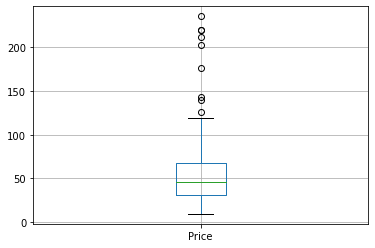

In [35]:
price = pbook.boxplot(['Price'])

## Task 2: Multivariate Outlier detection (6 points)
Lets use the DBSCAN Method for multivariate outlier detection. For this exercise, use the numerical and categorical columns to fit DBSCAN.
Your first task is to perform a bivariate analysis on all possible pairs of the above features and identify any outliers. The output should be all the DBSCAN plots and the outlier data row(index&value) for each combination.

In [36]:
pbook.columns

Index(['Rating', 'Reviews', 'Book_title', 'Description', 'Number_Of_Pages',
       'Type', 'Price'],
      dtype='object')

In [37]:
pbook.shape

(271, 7)

In [38]:
from sklearn.cluster import DBSCAN

In [39]:
from sklearn.neighbors import NearestNeighbors as NN

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
# if don't use this, scale of features might affect how distance is measured in outlier detection 
scaler = StandardScaler()

### Rating x Reviews

In [42]:
nei = NN(n_neighbors = 2)
nn = nei.fit(pbook[['Rating', 'Reviews']])
dist, ind = nn.kneighbors(pbook[['Rating', 'Reviews']])

In [43]:
import numpy as np

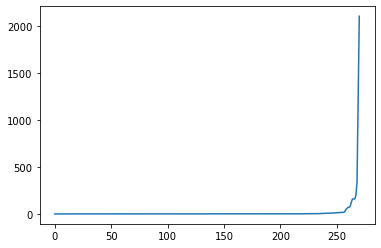

In [44]:
dist = np.sort(dist, axis=0)
dist = dist[:,1]
plt.plot(dist);

In [45]:
dist[250:]

array([  12.00050416,   13.00646378,   13.00646378,   15.00027   ,
         16.00025312,   17.00084998,   17.00084998,   21.00000238,
         46.00305316,   57.00042456,   70.00077785,   70.00077785,
         81.00001543,  129.00050232,  159.00010189,  159.00010189,
        160.00047531,  197.00008223,  339.00007139, 1200.00000417,
       2109.00000152])

In [46]:
# min_samples should be >= dimension of dataset + 1, generally 2x dim
clustering = DBSCAN(eps=350, min_samples = 14).fit(pbook[['Rating', 'Reviews']])

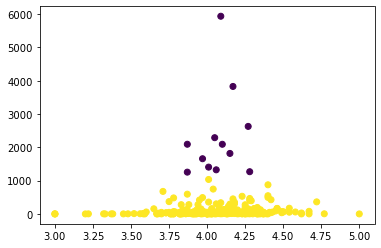

In [47]:
plt.scatter(pbook["Rating"], pbook["Reviews"], c = clustering.labels_); # outliers are in purple

In [48]:
clustering.labels_ # Noisy samples are given the label -1. 0's are core points

array([-1, -1,  0, -1, -1,  0, -1, -1, -1,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [49]:
# outlier data row(index&value)
print(pbook.loc[clustering.labels_ == -1, ['Rating','Reviews']])

    Rating  Reviews
0     4.17   3829.0
1     4.01   1406.0
3     3.97   1658.0
4     4.06   1325.0
6     4.09   5938.0
7     4.15   1817.0
8     3.87   2093.0
13    3.87   1255.0
19    4.10   2092.0
23    4.28   1268.0
45    4.27   2629.0
90    4.05   2290.0


### Rating x Number_Of_Pages

In [50]:
nei = NN(n_neighbors = 2)
nn = nei.fit(pbook[['Rating', 'Number_Of_Pages']])
dist, ind = nn.kneighbors(pbook[['Rating', 'Number_Of_Pages']])

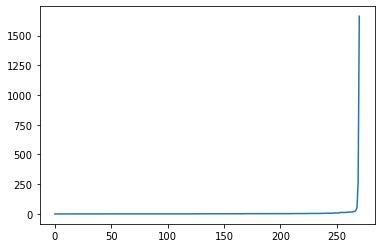

In [51]:
dist = np.sort(dist, axis=0)
dist = dist[:,1]
plt.plot(dist);

In [52]:
dist[260:]

array([  14.0195435 ,   15.00107996,   16.0009031 ,   16.0009031 ,
         17.00000294,   20.03077882,   21.00214275,   30.00352646,
         55.00641417,  271.00023911, 1662.00000677])

In [53]:
# min_samples should be >= dimension of dataset + 1, generally 2x dim
clustering = DBSCAN(eps=56, min_samples = 14).fit(pbook[['Rating', 'Number_Of_Pages']])

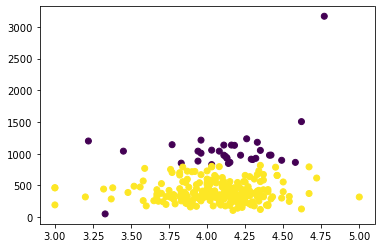

In [54]:
plt.scatter(pbook["Rating"], pbook["Number_Of_Pages"], c = clustering.labels_);

In [55]:
# outlier data row(index&value)
print(pbook.loc[clustering.labels_ == -1, ['Rating','Number_Of_Pages']])

     Rating  Number_Of_Pages
2      3.33               50
86     3.22             1200
119    4.29              914
129    3.96             1008
134    4.03              828
137    4.62             1506
155    3.83              851
186    4.12              959
188    4.22              976
198    4.58              863
202    4.32              927
203    3.96             1214
206    4.08             1040
212    4.13              928
214    4.30              908
216    4.41              976
224    4.15              864
225    3.94              883
232    3.77             1142
235    4.14              846
240    4.33             1180
245    4.35             1052
249    4.03             1056
251    4.42              978
252    4.11              976
253    4.11             1136
256    4.13              936
258    4.16             1136
259    4.18             1132
260    3.45             1040
265    4.26             1235
267    3.94             1040
268    4.49              896
269    4.77   

### Rating x Type

In [56]:
# need to preprocess categorical variable
pbook.Type.unique()

array(['Hardcover', 'Kindle Edition', 'Paperback', 'ebook',
       'Unknown Binding', 'Boxed Set - Hardcover'], dtype=object)

In [57]:
pbook['Type_Dummies'] = pbook["Type"].replace({"Paperback": 0, "Hardcover": 1, 'Boxed Set - Hardcover':2, 'Kindle Edition':3, "ebook":4, 'Unknown Binding':5})

In [58]:
pbook.head()

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price,Type_Dummies
0,4.17,3829.0,The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529,1
1,4.01,1406.0,"The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000,1
2,3.33,0.0,Responsive Web Design Overview For Beginners,In Responsive Web Design Overview For Beginner...,50,Kindle Edition,11.267647,3
3,3.97,1658.0,Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,Hardcover,12.873529,1
4,4.06,1325.0,How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,Kindle Edition,13.164706,3


In [152]:
nei = NN(n_neighbors = 2)
nn = nei.fit(scaler.fit_transform(pbook[['Rating', 'Type_Dummies']]))
dist, ind = nn.kneighbors(scaler.fit_transform(pbook[['Rating', 'Type_Dummies']]))

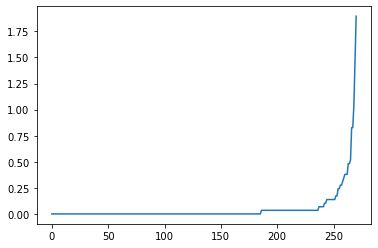

In [153]:
dist = np.sort(dist, axis=0)
dist = dist[:,1]
plt.plot(dist);

In [166]:
dist[250:]

array([0.1378304 , 0.1378304 , 0.172288  , 0.172288  , 0.24120321,
       0.24120321, 0.27566081, 0.27566081, 0.31011841, 0.34457601,
       0.37903361, 0.37903361, 0.37903361, 0.48240641, 0.48240641,
       0.51686401, 0.82698242, 0.82698242, 1.04515786, 1.48167684,
       1.89516805])

In [163]:
clustering = DBSCAN(eps=0.6, min_samples = 2).fit(scaler.fit_transform(pbook[['Rating', 'Type_Dummies']]))

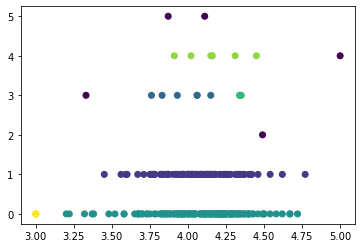

In [164]:
plt.scatter(pbook["Rating"], pbook["Type_Dummies"], c = clustering.labels_);

In [165]:
# outlier data row(index&value)
print(pbook.loc[clustering.labels_ == -1, ['Rating','Type_Dummies','Type']])

     Rating  Type_Dummies                   Type
2      3.33             3         Kindle Edition
54     5.00             4                  ebook
85     4.11             5        Unknown Binding
95     3.87             5        Unknown Binding
268    4.49             2  Boxed Set - Hardcover


### Rating x Price

In [65]:
nei = NN(n_neighbors = 2)
nn = nei.fit(scaler.fit_transform(pbook[['Rating', 'Price']]))
dist, ind = nn.kneighbors(scaler.fit_transform(pbook[['Rating', 'Price']]))

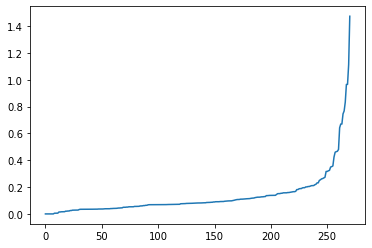

In [66]:
dist = np.sort(dist, axis=0)
dist = dist[:,1]
plt.plot(dist);

In [67]:
dist[245:]

array([0.26120472, 0.26347836, 0.26806684, 0.27304281, 0.3163624 ,
       0.3163624 , 0.32122595, 0.32441629, 0.34940374, 0.35235567,
       0.35725066, 0.42335882, 0.45938236, 0.46397204, 0.4664758 ,
       0.48010915, 0.64164733, 0.66953443, 0.66953443, 0.74520392,
       0.76684942, 0.83335267, 0.96481283, 0.96481283, 1.11197284,
       1.47259276])

In [68]:
clustering = DBSCAN(eps=0.5, min_samples = 14).fit(scaler.fit_transform(pbook[['Rating', 'Price']]))

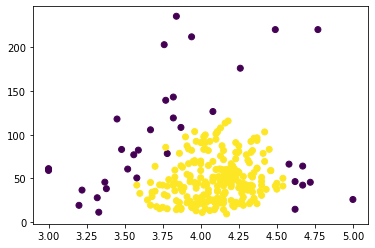

In [69]:
plt.scatter(pbook["Rating"], pbook["Price"], c = clustering.labels_);

In [70]:
# outlier data row(index&value)
print(pbook.loc[clustering.labels_ == -1, ['Rating','Price']])

     Rating       Price
2      3.33   11.267647
9      4.62   14.641176
24     3.20   19.152941
54     5.00   25.855882
60     3.32   27.850000
86     3.22   36.617647
94     3.38   38.235294
114    4.67   42.276471
131    4.72   45.561765
132    3.37   45.664706
137    4.62   46.358824
147    3.58   50.511765
177    3.00   59.082353
182    3.00   60.391176
184    3.52   60.682353
187    3.00   61.167647
194    4.67   64.091176
198    4.58   66.320588
213    3.56   77.052941
215    3.78   78.435294
226    3.59   82.367647
227    3.48   83.150000
255    3.67  105.650000
257    3.87  108.367647
260    3.45  117.988235
261    3.82  119.202941
262    4.08  126.579412
263    3.77  139.435294
264    3.82  143.138235
265    4.26  176.144118
266    3.76  203.108823
267    3.94  212.097059
268    4.49  220.385294
269    4.77  220.385294
270    3.84  235.650000


### Reviews x Number_Of_Pages

In [71]:
nei = NN(n_neighbors = 2)
nn = nei.fit(scaler.fit_transform(pbook[['Reviews', 'Number_Of_Pages']]))
dist, ind = nn.kneighbors(scaler.fit_transform(pbook[['Reviews', 'Number_Of_Pages']]))

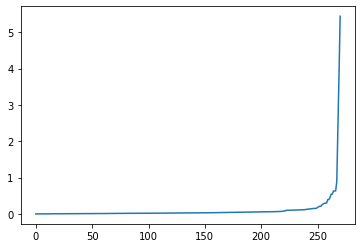

In [72]:
dist = np.sort(dist, axis=0)
dist = dist[:,1]
plt.plot(dist);

In [73]:
dist[250:]

array([0.17873598, 0.19752392, 0.21213798, 0.21281535, 0.25209071,
       0.27589547, 0.29098185, 0.2998875 , 0.2998875 , 0.39534329,
       0.39534329, 0.45202728, 0.54323809, 0.54323809, 0.62823057,
       0.62961769, 0.63386725, 0.88781346, 2.31476402, 3.85864394,
       5.43897421])

In [74]:
clustering = DBSCAN(eps=1, min_samples = 14).fit(scaler.fit_transform(pbook[['Reviews', 'Number_Of_Pages']]))

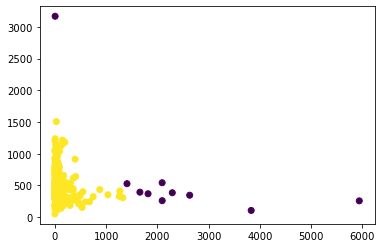

In [75]:
plt.scatter(pbook["Reviews"], pbook["Number_Of_Pages"], c = clustering.labels_);

In [76]:
# outlier data row(index&value)
print(pbook.loc[clustering.labels_ == -1, ['Reviews','Number_Of_Pages']])

     Reviews  Number_Of_Pages
0     3829.0              105
1     1406.0              527
3     1658.0              393
6     5938.0              256
7     1817.0              368
8     2093.0              259
19    2092.0              542
45    2629.0              345
90    2290.0              384
269      4.0             3168


### Reviews x Type

In [77]:
nei = NN(n_neighbors = 2)
nn = nei.fit(pbook[['Reviews', 'Type_Dummies']])
dist, ind = nn.kneighbors(pbook[['Reviews', 'Type_Dummies']])

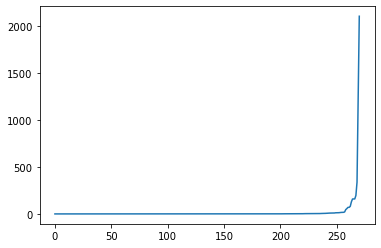

In [78]:
dist = np.sort(dist, axis=0)
dist = dist[:,1]
plt.plot(dist);

In [79]:
dist[250:]

array([  12.        ,   13.03840481,   13.03840481,   15.03329638,
         16.03121954,   17.        ,   17.        ,   21.        ,
         46.01086828,   57.07889277,   70.00714249,   70.00714249,
         81.0246876 ,  129.        ,  159.        ,  159.        ,
        160.        ,  197.00253805,  339.00147492, 1200.        ,
       2109.        ])

In [80]:
clustering = DBSCAN(eps=1300, min_samples = 14).fit(pbook[['Reviews', 'Type_Dummies']])

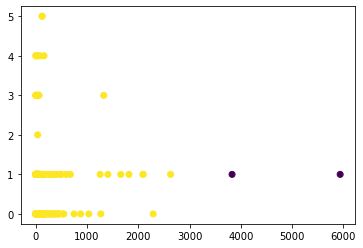

In [81]:
plt.scatter(pbook["Reviews"], pbook["Type_Dummies"], c = clustering.labels_);

In [82]:
# outlier data row(index&value)
print(pbook.loc[clustering.labels_ == -1, ['Reviews','Type_Dummies','Type']])

   Reviews  Type_Dummies       Type
0   3829.0             1  Hardcover
6   5938.0             1  Hardcover


### Reviews x Price

In [83]:
nei = NN(n_neighbors = 2)
nn = nei.fit(pbook[['Reviews', 'Price']])
dist, ind = nn.kneighbors(pbook[['Reviews', 'Price']])

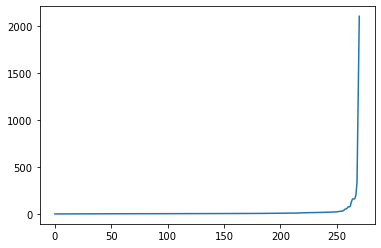

In [84]:
dist = np.sort(dist, axis=0)
dist = dist[:,1]
plt.plot(dist);

In [85]:
dist[250:]

array([  22.73314426,   23.1176471 ,   27.09092022,   27.42435714,
         27.93830093,   31.79957904,   34.47367182,   48.26315157,
         51.88599461,   57.31154169,   74.58594036,   74.58594036,
         81.02892046,  129.03975679,  159.00699232,  159.00699232,
        161.35545065,  198.2964692 ,  339.24468311, 1200.09293932,
       2109.00571278])

In [86]:
clustering = DBSCAN(eps=1300, min_samples = 14).fit(pbook[['Reviews', 'Price']])

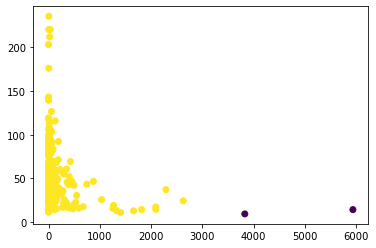

In [87]:
plt.scatter(pbook["Reviews"], pbook["Price"], c = clustering.labels_);

In [88]:
# outlier data row(index&value)
print(pbook.loc[clustering.labels_ == -1, ['Reviews','Price']])

   Reviews      Price
0   3829.0   9.323529
6   5938.0  14.232353


### Number_Of_Pages x Type

In [89]:
nei = NN(n_neighbors = 2)
nn = nei.fit(pbook[['Number_Of_Pages', 'Type_Dummies']])
dist, ind = nn.kneighbors(pbook[['Number_Of_Pages', 'Type_Dummies']])

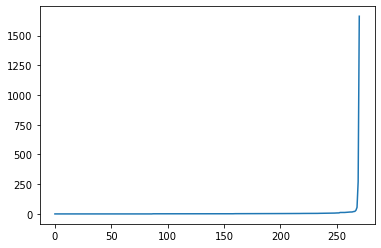

In [90]:
dist = np.sort(dist, axis=0)
dist = dist[:,1]
plt.plot(dist);

In [91]:
dist[250:]

array([   8.06225775,    8.54400375,    8.54400375,   12.        ,
         12.        ,   12.        ,   12.04159458,   12.16552506,
         13.03840481,   14.        ,   14.        ,   15.13274595,
         16.        ,   16.        ,   17.        ,   20.02498439,
         21.02379604,   30.01666204,   55.03635162,  271.        ,
       1662.        ])

In [92]:
clustering = DBSCAN(eps=272, min_samples = 14).fit(pbook[['Number_Of_Pages', 'Type_Dummies']])

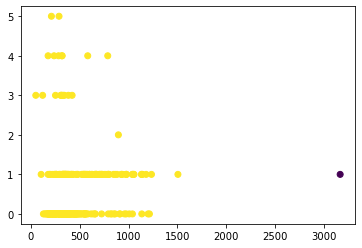

In [93]:
plt.scatter(pbook["Number_Of_Pages"], pbook["Type_Dummies"], c = clustering.labels_);

In [94]:
# outlier data row(index&value)
print(pbook.loc[clustering.labels_ == -1, ['Number_Of_Pages','Type_Dummies','Type']])

     Number_Of_Pages  Type_Dummies       Type
269             3168             1  Hardcover


### Number_Of_Pages x Price

In [95]:
nei = NN(n_neighbors = 2)
nn = nei.fit(pbook[['Number_Of_Pages', 'Price']])
dist, ind = nn.kneighbors(pbook[['Number_Of_Pages', 'Price']])

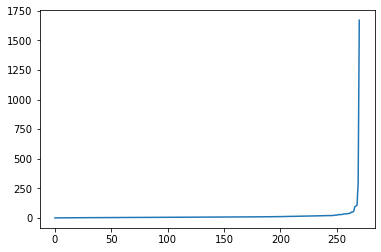

In [96]:
dist = np.sort(dist, axis=0)
dist = dist[:,1]
plt.plot(dist);

In [97]:
dist[250:]

array([  24.20212537,   26.40420189,   28.20179156,   28.20179156,
         28.37389771,   29.22976691,   33.03050072,   34.24806829,
         34.24806829,   35.71417483,   35.8824206 ,   38.57748696,
         39.98217599,   49.27401108,   49.27401108,   55.03434921,
         94.1088235 ,  100.3106974 ,  108.08335323,  292.79153432,
       1671.08623729])

In [98]:
clustering = DBSCAN(eps=300, min_samples = 14).fit(pbook[['Number_Of_Pages', 'Price']])

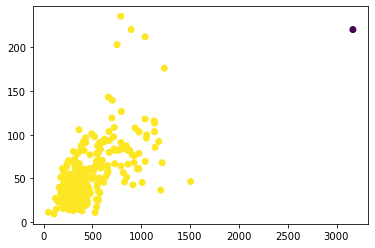

In [99]:
plt.scatter(pbook["Number_Of_Pages"], pbook["Price"], c = clustering.labels_);

In [100]:
# outlier data row(index&value)
print(pbook.loc[clustering.labels_ == -1, ['Number_Of_Pages','Price']])

     Number_Of_Pages       Price
269             3168  220.385294


Your second task is to look for all combinations of three variables in the above dataset to identify multivariate outliers. The output should again be all the dbscan plots(3D) and the outlier data row for all combinations.

### Rating x Reviews x Number_Of_Pages

In [101]:
nei = NN(n_neighbors = 3)
nn = nei.fit(pbook[['Rating', 'Reviews', 'Number_Of_Pages']])
dist, ind = nn.kneighbors(pbook[['Rating', 'Reviews', 'Number_Of_Pages']])

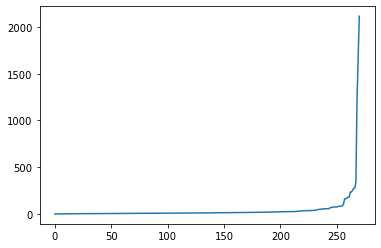

In [102]:
dist = np.sort(dist, axis=0)
dist = dist[:,1]
plt.plot(dist);

In [103]:
dist[250:]

array([  74.10806231,   78.01066658,   81.61117816,   83.02424706,
         83.02424706,   85.00098882,  106.30197035,  160.95351006,
        160.95351006,  170.83655815,  179.63594546,  179.78918794,
        233.31102074,  233.31102074,  253.31403929,  271.97450175,
        276.14670032,  341.23605964, 1223.76468735, 1662.17328293,
       2114.39873401])

In [104]:
clustering = DBSCAN(eps=350, min_samples = 14).fit(pbook[['Rating', 'Reviews', 'Number_Of_Pages']])

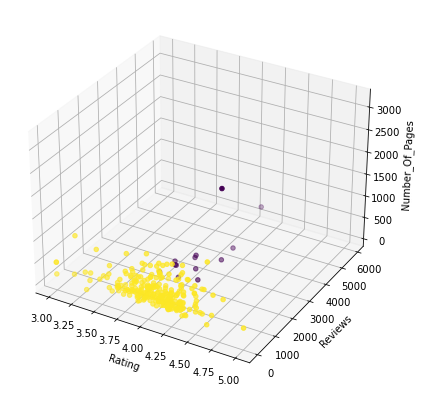

In [105]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(pbook["Rating"], pbook["Reviews"], pbook["Number_Of_Pages"], c = clustering.labels_)
# ax.scatter3D

ax.set_xlabel('Rating')
ax.set_ylabel('Reviews')
ax.set_zlabel('Number_Of_Pages')

plt.show()

In [106]:
print(pbook.loc[clustering.labels_ == -1, ['Rating','Reviews','Number_Of_Pages']])

     Rating  Reviews  Number_Of_Pages
0      4.17   3829.0              105
1      4.01   1406.0              527
3      3.97   1658.0              393
4      4.06   1325.0              305
6      4.09   5938.0              256
7      4.15   1817.0              368
8      3.87   2093.0              259
13     3.87   1255.0              328
19     4.10   2092.0              542
23     4.28   1268.0              412
45     4.27   2629.0              345
90     4.05   2290.0              384
269    4.77      4.0             3168


### Rating x Reviews x Type

In [107]:
nei = NN(n_neighbors = 3)
nn = nei.fit(pbook[['Rating', 'Reviews', 'Type_Dummies']])
dist, ind = nn.kneighbors(pbook[['Rating', 'Reviews', 'Type_Dummies']])

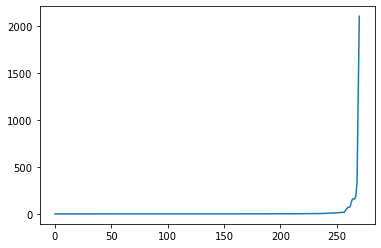

In [108]:
dist = np.sort(dist, axis=0)
dist = dist[:,1]
plt.plot(dist);

In [109]:
dist[250:]

array([  12.00050416,   13.04484956,   13.04484956,   15.03356578,
         16.03147217,   17.00084998,   17.00084998,   21.00000238,
         46.01392072,   57.07931674,   70.00792027,   70.00792027,
         81.02470302,  129.00050232,  159.00010189,  159.00010189,
        160.00047531,  197.00262029,  339.00154631, 1200.00000417,
       2109.00000152])

In [110]:
clustering = DBSCAN(eps=1201, min_samples = 14).fit(pbook[['Rating', 'Reviews', 'Type_Dummies']])

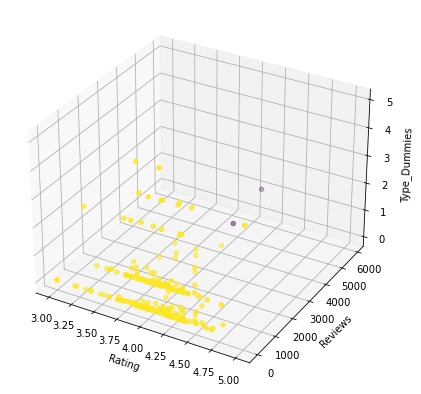

In [111]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(pbook["Rating"], pbook["Reviews"], pbook["Type_Dummies"], c = clustering.labels_)
# ax.scatter3D

ax.set_xlabel('Rating')
ax.set_ylabel('Reviews')
ax.set_zlabel('Type_Dummies')

plt.show()

In [112]:
print(pbook.loc[clustering.labels_ == -1, ['Rating','Reviews','Type']])

   Rating  Reviews       Type
0    4.17   3829.0  Hardcover
6    4.09   5938.0  Hardcover


### Rating x Reviews x Price

In [113]:
nei = NN(n_neighbors = 3)
nn = nei.fit(pbook[['Rating', 'Reviews', 'Price']])
dist, ind = nn.kneighbors(pbook[['Rating', 'Reviews', 'Price']])

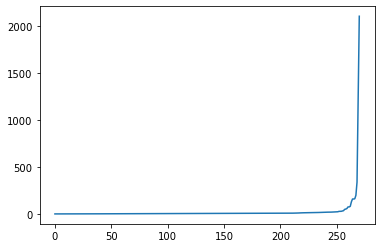

In [114]:
dist = np.sort(dist, axis=0)
dist = dist[:,1]
plt.plot(dist);

In [115]:
dist[250:]

array([  22.73721064,   23.11766657,   27.09101066,   27.42891475,
         27.9386517 ,   31.79976929,   34.47534842,   48.26606157,
         51.88646101,   57.31196395,   74.58667039,   74.58667039,
         81.02893589,  129.04025896,  159.0070942 ,  159.0070942 ,
        161.35592196,  198.2965509 ,  339.24475444, 1200.09294349,
       2109.0057143 ])

In [116]:
clustering = DBSCAN(eps=1201, min_samples = 14).fit(pbook[['Rating', 'Reviews', 'Price']])

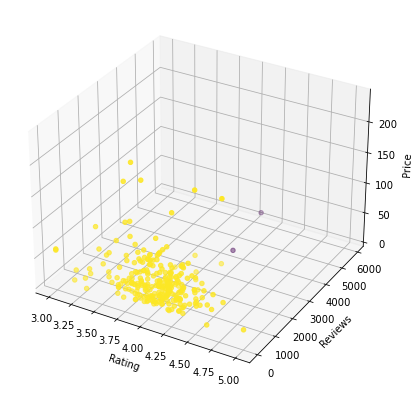

In [117]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(pbook["Rating"], pbook["Reviews"], pbook["Price"], c = clustering.labels_)
# ax.scatter3D

ax.set_xlabel('Rating')
ax.set_ylabel('Reviews')
ax.set_zlabel('Price')

plt.show()

In [118]:
print(pbook.loc[clustering.labels_ == -1, ['Rating','Reviews','Price']])

   Rating  Reviews      Price
0    4.17   3829.0   9.323529
6    4.09   5938.0  14.232353


###  Reviews x Number_Of_Pages x Type

In [119]:
nei = NN(n_neighbors = 3)
nn = nei.fit(pbook[['Number_Of_Pages', 'Reviews', 'Type_Dummies']])
dist, ind = nn.kneighbors(pbook[['Number_Of_Pages', 'Reviews', 'Type_Dummies']])

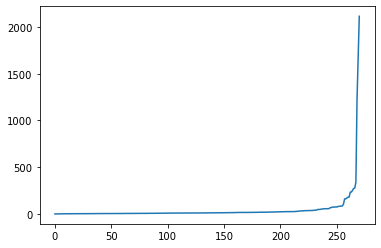

In [120]:
dist = np.sort(dist, axis=0)
dist = dist[:,1]
plt.plot(dist);

In [121]:
dist[250:]

array([  74.11477585,   78.05767099,   81.61494961,   83.02409289,
         83.02409289,   85.00588215,  106.30616163,  160.95340941,
        160.95340941,  170.83617884,  179.63852593,  179.78876494,
        233.31309436,  233.31309436,  253.31600818,  271.97426349,
        276.14670014,  341.23745398, 1223.76468326, 1662.17327617,
       2114.3987325 ])

In [122]:
clustering = DBSCAN(eps=342, min_samples = 14).fit(pbook[['Number_Of_Pages', 'Reviews', 'Type_Dummies']])

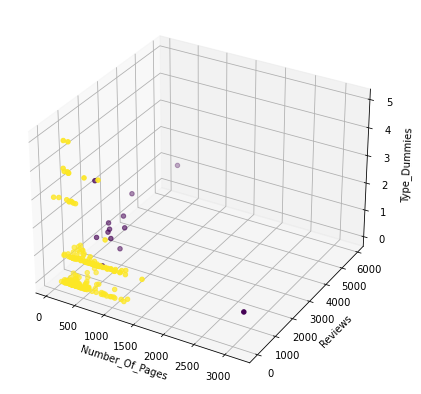

In [123]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(pbook["Number_Of_Pages"], pbook["Reviews"], pbook["Type_Dummies"], c = clustering.labels_)
# ax.scatter3D

ax.set_xlabel('Number_Of_Pages')
ax.set_ylabel('Reviews')
ax.set_zlabel('Type_Dummies')

plt.show()

In [124]:
print(pbook.loc[clustering.labels_ == -1, ['Number_Of_Pages', 'Reviews', 'Type']])

     Number_Of_Pages  Reviews            Type
0                105   3829.0       Hardcover
1                527   1406.0       Hardcover
3                393   1658.0       Hardcover
4                305   1325.0  Kindle Edition
6                256   5938.0       Hardcover
7                368   1817.0       Hardcover
8                259   2093.0       Hardcover
13               328   1255.0       Hardcover
19               542   2092.0       Hardcover
23               412   1268.0       Paperback
45               345   2629.0       Hardcover
90               384   2290.0       Paperback
269             3168      4.0       Hardcover


###  Reviews x Number_Of_Pages x Price

In [125]:
nei = NN(n_neighbors = 3)
nn = nei.fit(pbook[['Number_Of_Pages', 'Reviews', 'Price']])
dist, ind = nn.kneighbors(pbook[['Number_Of_Pages', 'Reviews', 'Price']])

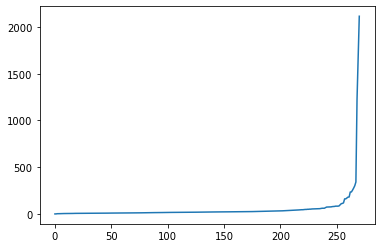

In [126]:
dist = np.sort(dist, axis=0)
dist = dist[:,1]
plt.plot(dist);

In [127]:
dist[250:]

array([  83.04222568,   83.04222568,   85.06998589,   96.4233927 ,
        109.37578571,  112.4411457 ,  117.77526672,  160.96031687,
        160.96031687,  170.86620155,  179.81972963,  180.99608132,
        234.40667588,  234.40667588,  254.09541195,  276.3115817 ,
        301.35398215,  341.47906966, 1223.8558179 , 1671.25857139,
       2114.4044307 ])

In [128]:
clustering = DBSCAN(eps=342, min_samples = 14).fit(pbook[['Number_Of_Pages', 'Reviews', 'Price']])

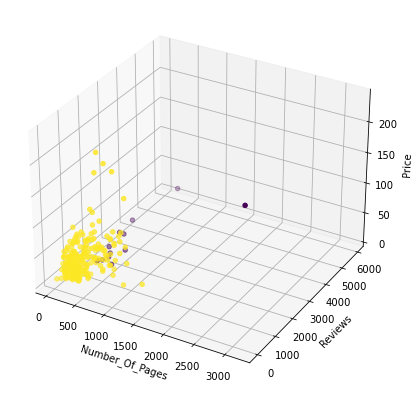

In [129]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(pbook["Number_Of_Pages"], pbook["Reviews"], pbook["Price"], c = clustering.labels_)
# ax.scatter3D

ax.set_xlabel('Number_Of_Pages')
ax.set_ylabel('Reviews')
ax.set_zlabel('Price')

plt.show()

In [130]:
print(pbook.loc[clustering.labels_ == -1, ['Price','Reviews','Number_Of_Pages']])

          Price  Reviews  Number_Of_Pages
0      9.323529   3829.0              105
1     11.000000   1406.0              527
3     12.873529   1658.0              393
4     13.164706   1325.0              305
6     14.232353   5938.0              256
7     14.364706   1817.0              368
8     14.502941   2093.0              259
13    15.682353   1255.0              328
19    17.229412   2092.0              542
23    19.132353   1268.0              412
45    24.258824   2629.0              345
90    37.141176   2290.0              384
269  220.385294      4.0             3168


###  Number_Of_Pages x Type x Price

In [131]:
nei = NN(n_neighbors = 3)
nn = nei.fit(pbook[['Number_Of_Pages', 'Type_Dummies', 'Price']])
dist, ind = nn.kneighbors(pbook[['Number_Of_Pages', 'Type_Dummies', 'Price']])

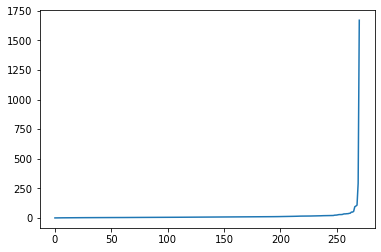

In [132]:
dist = np.sort(dist, axis=0)
dist = dist[:,1]
plt.plot(dist);

In [133]:
dist[250:]

array([  24.20212537,   26.42313148,   28.21951536,   28.21951536,
         28.39151407,   29.22976691,   33.03050072,   34.24806829,
         34.24806829,   35.71417483,   35.8824206 ,   38.57748696,
         39.98217599,   49.27401108,   49.27401108,   55.07067816,
         94.11413635,  100.3106974 ,  108.08797919,  292.79324201,
       1671.08623729])

In [134]:
clustering = DBSCAN(eps=300, min_samples = 14).fit(pbook[['Number_Of_Pages', 'Type_Dummies', 'Price']])

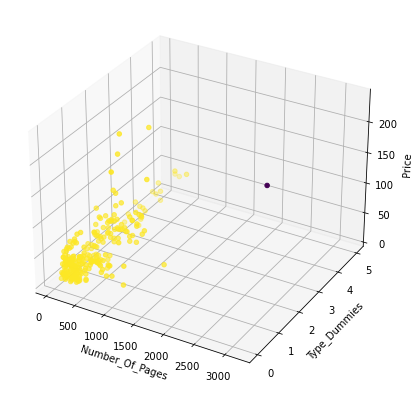

In [135]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(pbook["Number_Of_Pages"], pbook["Type_Dummies"], pbook["Price"], c = clustering.labels_)
# ax.scatter3D

ax.set_xlabel('Number_Of_Pages')
ax.set_ylabel('Type_Dummies')
ax.set_zlabel('Price')

plt.show()

In [136]:
print(pbook.loc[clustering.labels_ == -1, ['Type','Price','Number_Of_Pages']])

          Type       Price  Number_Of_Pages
269  Hardcover  220.385294             3168


# Turning it in
1. A Jupyter Notebook(q3.jpynb) with all code, output and graphs.
2. Please export your q3.jpynb to a q3.py and upload this q3.py as well. We will need to run a plagiarism check on the code. (do not zip these two files)
